# Цель работы

Мы будем рассматривать набор данных о домах и населении, находящихся в Калифорнии, и некоторые сводные статистические данные о них, основанные на данных переписи населения 1990 года.

**Основная задача**: построение модели, которая сможет предсказывать, будет ли дом стоить дороже 150 тысяч долларов США или нет.

# Описание данных:

Об этом файле
1. longitude: Мера того, как далеко на запад находится дом; чем больше значение, тем дальше на запад.

2. latitude:  Мера того, как далеко на север находится дом; более высокое значение - дальше на север.

3. housingMedianAge: средний возраст дома в пределах квартала; меньшее число означает более новое здание.

4. totalRooms: Общее число домов\квартир

5. totalBedrooms: Общее число жилых помещений в домах\квартирах

6. population: Общее количество людей, проживающих в квартале

7. households: Общее количество домохозяйств, группа людей, проживающих в одном квартале.

8. medianIncome: Медианный доход для домохозяйств в пределах квартала домов (измеряется в десятках тысяч долларов США)

9. medianHouseValue: Медианная стоимость дома для домохозяйств в пределах квартала (измеряется в долларах США)

10. oceanProximity: Расположение дома по отношению к океану/морю

# Начало работы:

In [15]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

# Подготовка данных

## Форматирование данных 

In [16]:
#загружаем датасет
houses = pd.read_csv('../input/house-price/house_prices.csv')

In [17]:
#смотрим на размер датафрейма
houses.shape

(20640, 10)

In [18]:
houses.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0years,880,129.0,322,126,8.3252,452600.0$,NEAR BAY
1,-122.22,37.86,21.0,7099,1106.0,2401,1138,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467,190.0,496,177,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274,235.0,558,219,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627,280.0,565,259,3.8462,342200.0,NEAR BAY


**замечаем, что в признаках "housing_median_age" и "median_house_value" есть строковые значения, 
подготовим их для приведения признаков к числовому виду при помощи функции map 
и затем приведём данные признаки к числовому значению с помощью astype**

In [19]:
houses['housing_median_age'] = houses['housing_median_age'].map(lambda x: x.rstrip('years')).astype(float)
houses['median_house_value'] = houses['median_house_value'].map(lambda x: x.rstrip('$')).astype(float)

houses

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880,129.0,322,126,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099,1106.0,2401,1138,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467,190.0,496,177,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274,235.0,558,219,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627,280.0,565,259,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374.0,845,330,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697,150.0,356,114,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254,485.0,1007,433,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860,409.0,741,349,1.8672,84700.0,INLAND


**Посмотрим общую информация о датасете(количество значений и их тип), в данном случае видим, что у нас есть некоторые пропуски в признаке "total_bedrooms", к которым мы позже вернёмся**

In [20]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(6), int64(3), object(1)
memory usage: 1.6+ MB


In [21]:
#приведение признаков к целочисленному значению
houses['housing_median_age'] = houses['housing_median_age'].astype(int)
houses['housing_median_age'] = houses['housing_median_age'].astype(int)
houses['median_house_value'] = houses['median_house_value'].astype(int)

In [22]:
#смотрим на размер датафрейма с удалёнными дупликатами(если они есть)
houses_remove_duplicates = pd.DataFrame.drop_duplicates(houses)
houses_remove_duplicates.shape

(20640, 10)

**как можно заметить, повторов в нашем датасете нет**

Метод describe показывает основные статистические характеристики данных по каждому числовому признаку (типы int64 и float64)

In [23]:
houses.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Обработка пропущенных значений

Посмотрим количество пропущенных значений для признака "total_bedrooms":

In [24]:
missing_value = houses['total_bedrooms'].isna().sum()
missing_value

207

Также посмотрим пропущенне значения в процентном соотношении ко всем данным для признака "total_bedrooms" для разных категорий по признаку 'ocean_proximity':

In [25]:
houses[houses['total_bedrooms'].isna()]['ocean_proximity'].value_counts()/houses['ocean_proximity'].value_counts()

<1H OCEAN     0.011165
INLAND        0.008396
ISLAND             NaN
NEAR BAY      0.008734
NEAR OCEAN    0.011287
Name: ocean_proximity, dtype: float64

In [26]:
(missing_value / houses.shape[0]) * 100

1.002906976744186

Видим, что процент всех пропущенных значений от всех данных составляет 1%. Также можно заметить, что процент пропусков по категориям для 'ocean_proximity' находится в районе 1%, т.е. нет какого-то сильного дисбаланса в пропусках для данной параметра.
Мы можем заменить пропуски на нулевые значения (возможно это дома, в которых только квартиры-студии или это офисные здания, где не предполагается наличие спален)
С другой стороны это могут быть повреждённые данные и в этих домах на самом деле признак "total_bedrooms" не равен 0. В таких случаях значения можно заменить на средние или медианные значения.
Но в нашем случае лучше будет удалить строки с пропусками, чтобы это в дальнейшем не повлияло на точность предсказаний.

In [27]:
houses = houses.dropna(axis=0)

In [28]:
houses['total_bedrooms'] = houses['total_bedrooms'].astype(int)

## Новые переменные

Cоздадим новый бинарный признак 'price_category', который указывает, что значение 'median_house_value' больше или равно 150000 (1), и (0) если меньше. В дальнейшем это будет нашим целевым признаком, который мы будем пытаться предсказывать.

In [29]:
houses['price_category'] = houses['median_house_value'].apply(lambda x: 1 if x >= 150000 else 0)
houses.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,price_category
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY,1
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY,1
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY,1
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY,1
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY,1


# EDA (Exploratory Data Analysis)

**Сделаем предварительный сравнительный анализ по всем числовым критериям с разбивкой по целевому признаку (стоимость дома выше или ниже 150000):**

<Figure size 1080x1080 with 0 Axes>

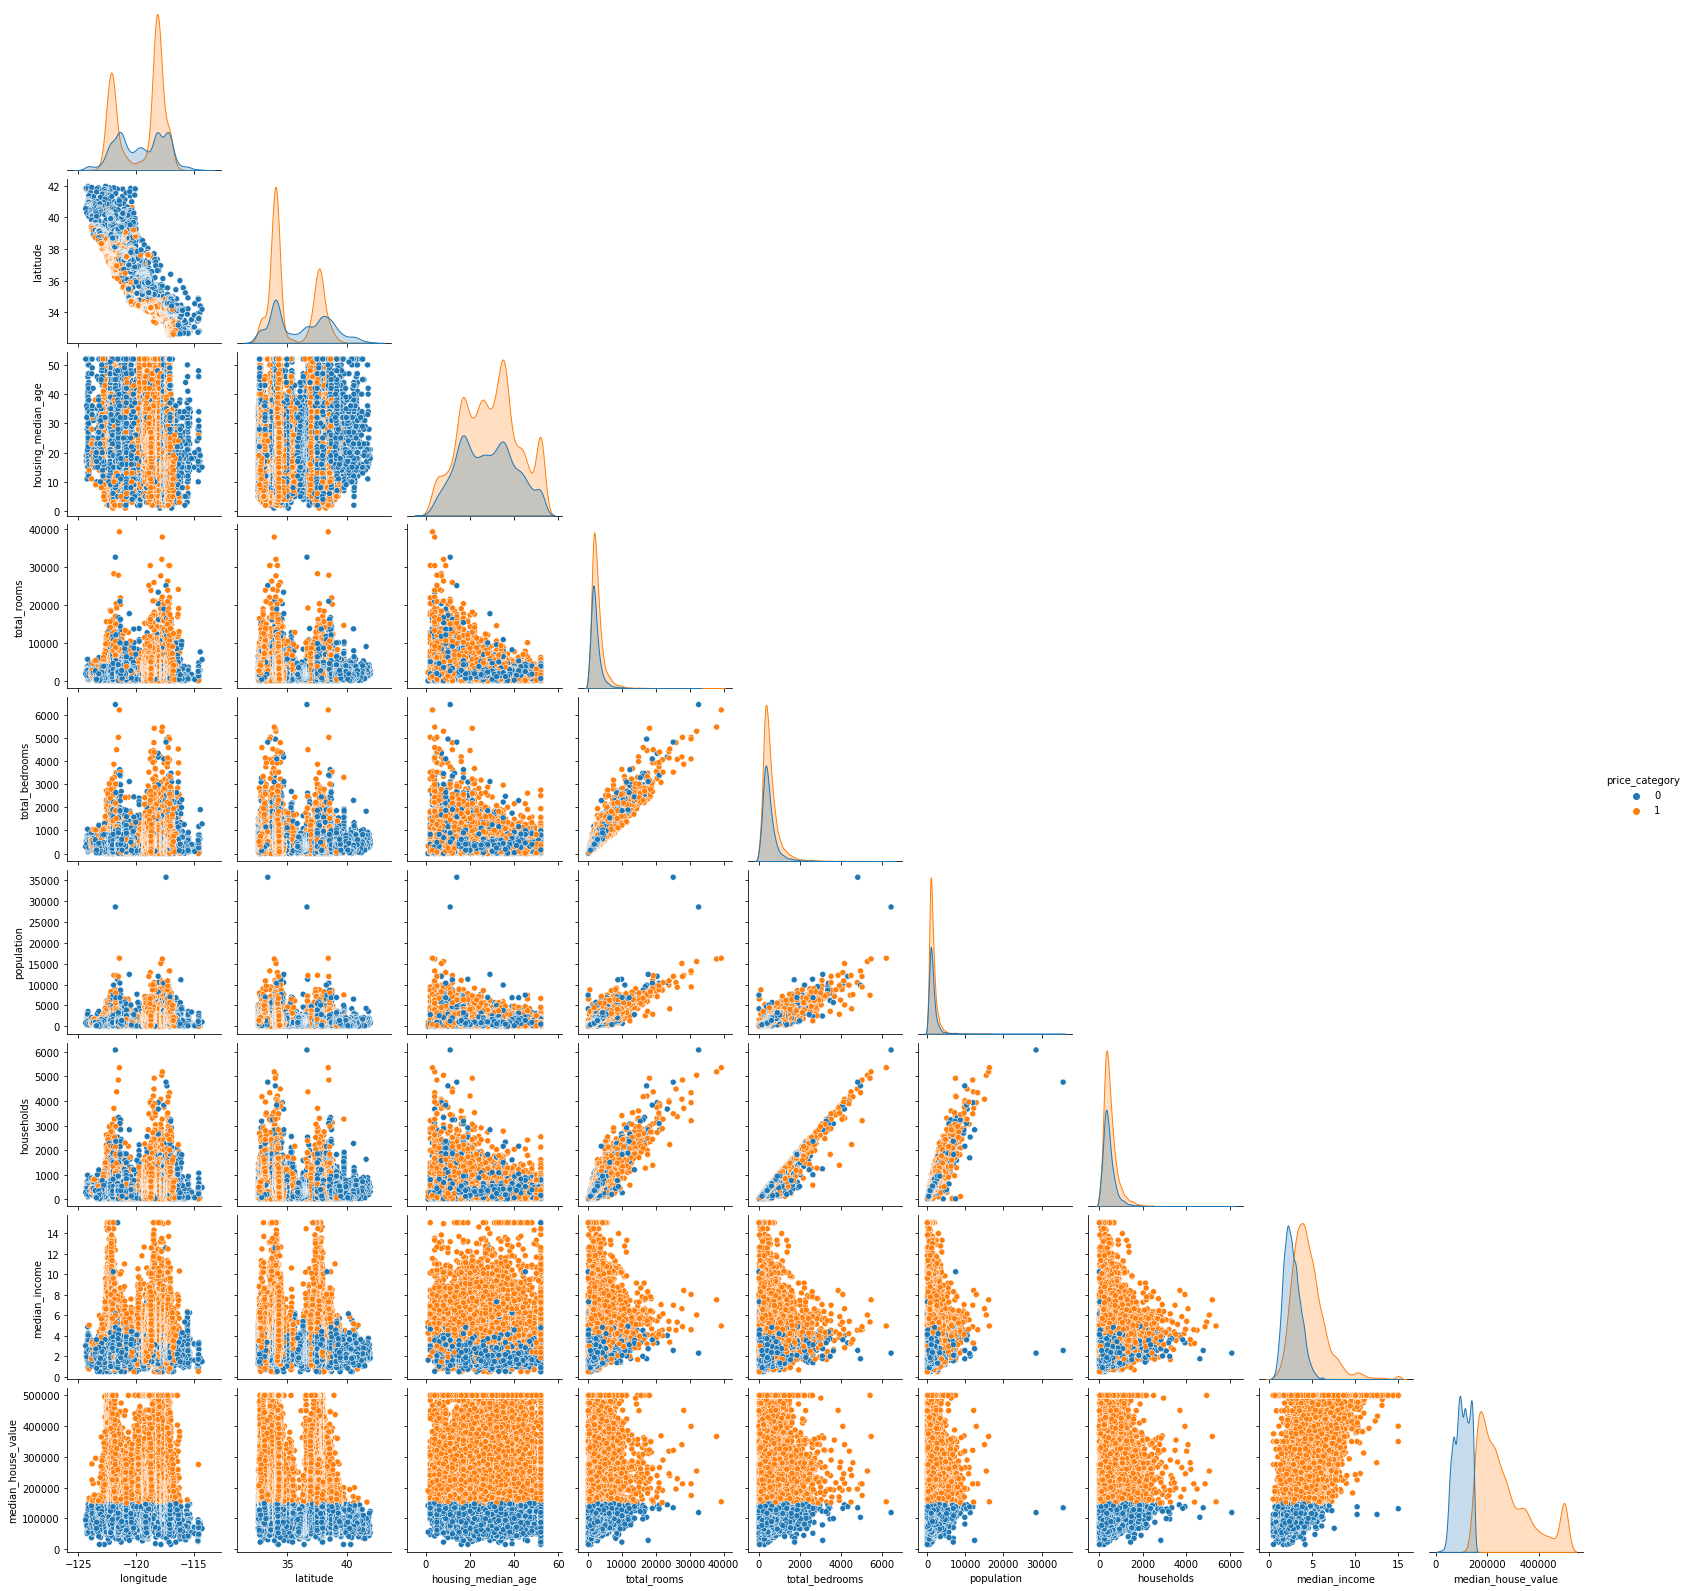

In [30]:
plt.figure(figsize=(15,15))
sns.pairplot(houses, hue='price_category', corner=True)
plt.show()

Можем заметить, что многие числовые значения имеют длинный правый хвост.

Также мы можем увидеть некие логичные взаимосвязи между количеством спален и комнат в целом, количеством домохозяйств и спален.

## География

**Построим график отображающий плотность населения (при помощи размера точек) и медианную цену домов (при помощи цвета точек) в зависимости от координат их расположения**

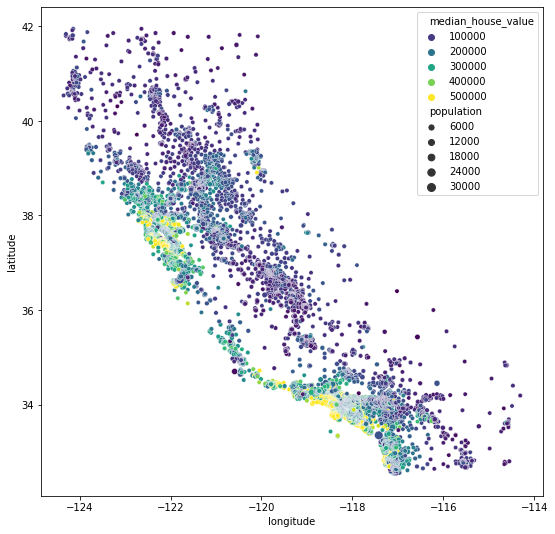

In [31]:
plt.figure(figsize=(9,9))
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', size='population', data=houses, palette='viridis')
plt.show()

можно заметить, что чем ближе к океану находится дом, тем он дороже стоит

**Построим график распределения жилья с указанием категории расположения дома**

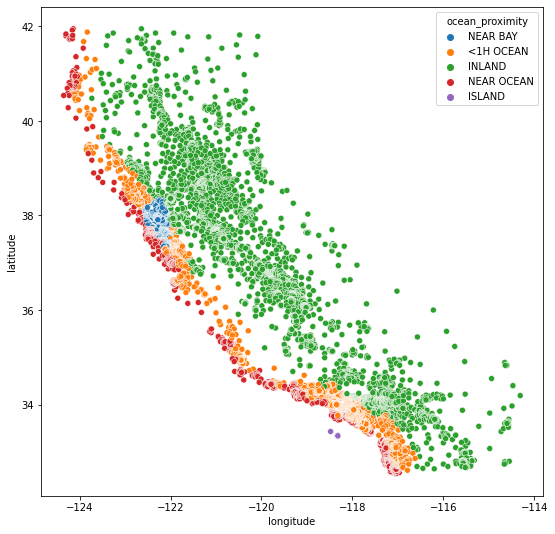

In [32]:
plt.figure(figsize=(9,9))
sns.scatterplot(x='longitude', y='latitude', hue='ocean_proximity', data=houses)
plt.show()

Если сравнить данный график с предыдущим, то можем увидеть, что высокая стоимость наблюдается непосредственно возле океана, а также постепенно начинает расти при приближении к пляжу

**Построим график распределения нашего целевого признака в зависимости от координат**

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

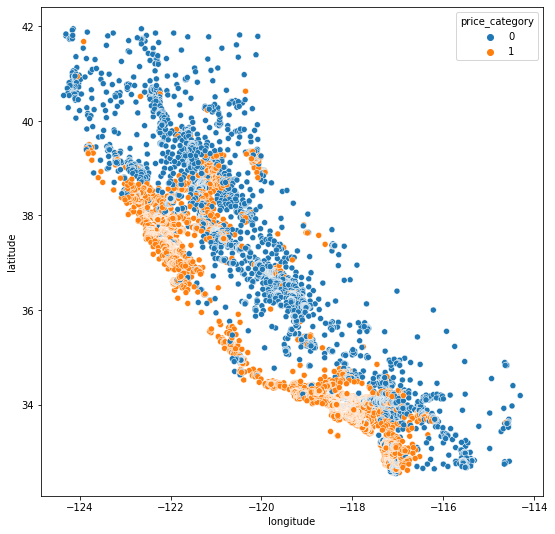

In [33]:
plt.figure(figsize=(9,9))
sns.scatterplot(x='longitude', y='latitude', hue='price_category', data=houses)

Исходя из полученных графиков мы можем сделать вывод, что географическое положение оказывает очень сильное влияние на цену дома, поэтому переменные долготы и широты обладают важной предсказательной способностью.

## Числовые переменные

Посмотрим на гистограммы числовых признаков. Как уже было замеченно многие признаки имеют тяжёлый правый хвост, поэтому нормализуем их при помощи логарифмирования

In [34]:
log_features = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
houses[log_features] = np.log(houses[log_features])

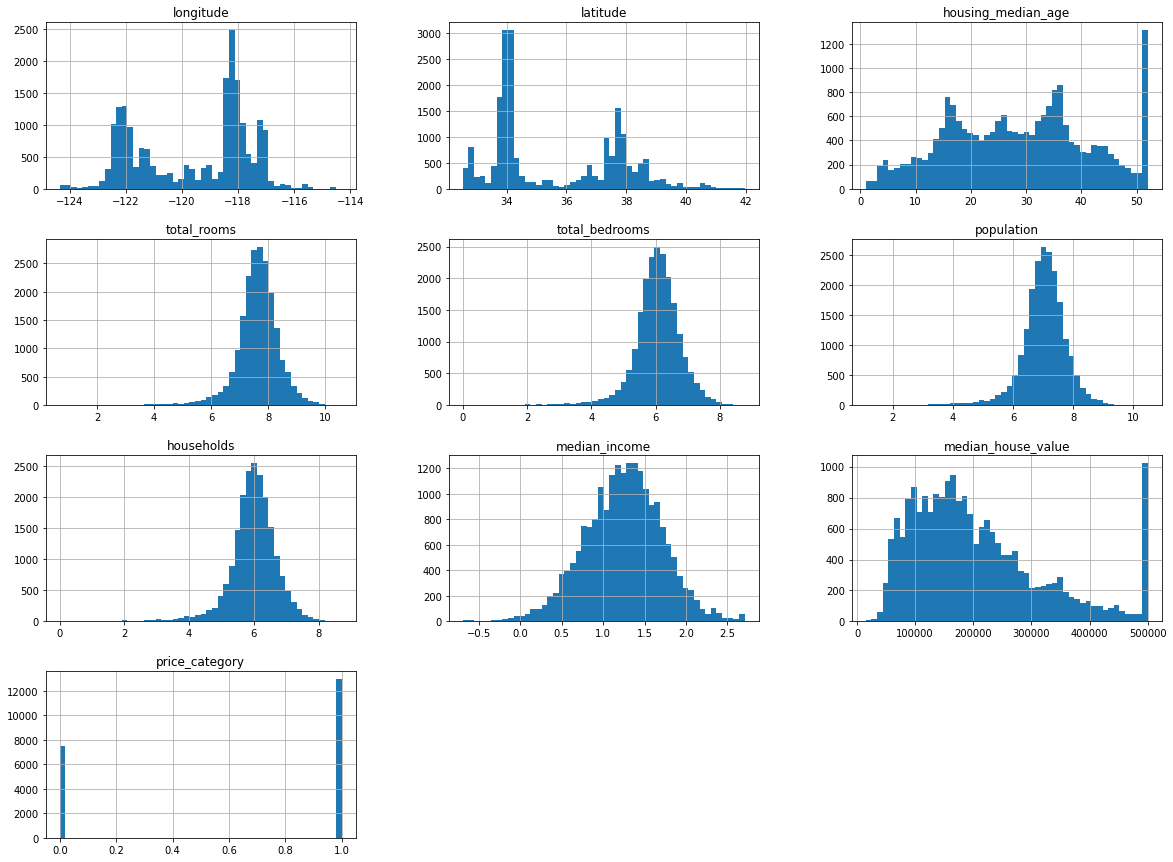

In [35]:
%matplotlib inline
houses.hist(bins = 50, figsize= (20,15))
plt.show()

## Выбросы в данных

**Мы видим, что гистограмма медианных цен на дом имеет некий выброс цены >500k$**


Посмотрим подробнее на этот "хвост" с выбросами:

In [36]:
houses[houses['median_house_value']>450000]['median_house_value'].value_counts().head()

500001    958
500000     27
475000      7
483300      6
466700      4
Name: median_house_value, dtype: int64

<AxesSubplot:ylabel='median_house_value'>

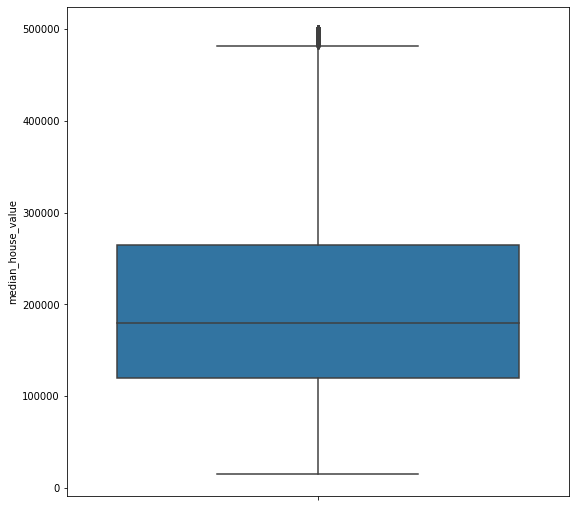

In [37]:
plt.figure(figsize=(9,9))
sns.boxplot(y=houses['median_house_value'])

**Большое количество значений равных 500001 возможно связано с какими-то повреждениям/ошибкам при записи/чтении базы данных**

Посмотрим на процентное соотношение значений из "хвоста" в зависимости от группы близости к океану.

In [38]:
houses[houses['median_house_value']>500000]['ocean_proximity'].value_counts()/houses['ocean_proximity'].value_counts()

<1H OCEAN     0.058557
INLAND        0.004156
ISLAND             NaN
NEAR BAY      0.085022
NEAR OCEAN    0.079528
Name: ocean_proximity, dtype: float64

Как можем заметить значения равные 500001 распределенны в основном по трём категориям <1H OCEAN, NEAR BAY, NEAR OCEAN

# Подготовка данных для обучения 

## Нормализация и стандартизация данных

Нормализация (normalization) и стандартизация (standardization) являются методами изменения диапазонов значений – шкалирования. Шкалирование особенно полезно в машинном обучении, поскольку разные атрибуты могут измеряться в разных диапазонах, или значения одного атрибута варьируются слишком сильно. Например, один атрибут имеет диапазон от 0 до 1, а второй — от 1 до 1000. Для задачи регрессии второй атрибут оказывал бы большое влияние на обучение, хотя не факт, что он является более важным, чем первый. Нормализация и стандартизация отличаются своими подходами:

* Нормализация подразумевает изменение диапазонов в данных без изменения формы распределения,

* Стандартизация изменяет форму распределения данных (приводится к нормальному распределению).

Обычно достаточно нормализовать данные. Стандартизацию стоит применять при использование алгоритмов, которые основываются на измерении расстояний, например, k ближайших соседей или метод опорных векторов (SVM).

In [39]:
#создадим массив с числовыми признаками, которые мы будем стандартизировать
num_features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

In [40]:
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
stand_features = scaler.fit_transform(houses[num_features])

In [41]:
stand_features.shape

(20433, 6)

In [42]:
other_features = ['longitude', 'latitude', 'ocean_proximity', 'median_house_value', 'price_category']

In [43]:
houses.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,price_category
0,-122.23,37.88,41,6.779922,4.859812,5.774552,4.836282,2.119287,452600,NEAR BAY,1
1,-122.22,37.86,21,8.867709,7.008505,7.783641,7.037028,2.116424,358500,NEAR BAY,1
2,-122.24,37.85,52,7.290975,5.247024,6.206576,5.176150,1.982022,352100,NEAR BAY,1
3,-122.25,37.85,52,7.149917,5.459586,6.324359,5.389072,1.730434,341300,NEAR BAY,1
4,-122.25,37.85,52,7.394493,5.634790,6.336826,5.556828,1.347086,342200,NEAR BAY,1


In [44]:
#создание датафрейма со стандартизированными значениями
houses_standard = pd.DataFrame(stand_features, columns = num_features)
houses_standard[other_features] = houses[other_features]

In [45]:
houses_standard

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,longitude,latitude,ocean_proximity,median_house_value,price_category
0,0.982163,-1.129056,-1.625687,-1.691249,-1.560772,1.858507,-122.23,37.88,NEAR BAY,452600.0,1.0
1,-0.606210,1.648010,1.306611,1.028830,1.440800,1.852423,-122.22,37.86,NEAR BAY,358500.0,1.0
2,1.855769,-0.449280,-1.097264,-1.106337,-1.097230,1.566841,-122.24,37.85,NEAR BAY,352100.0,1.0
3,1.855769,-0.636908,-0.807183,-0.946872,-0.806829,1.032259,-122.25,37.85,NEAR BAY,341300.0,1.0
4,1.855769,-0.311585,-0.568084,-0.929993,-0.578028,0.217710,-122.25,37.85,NEAR BAY,342200.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
20428,-0.288535,-0.280876,-0.173053,-0.385039,-0.247606,-1.699328,-118.83,34.23,<1H OCEAN,425800.0,1.0
20429,-0.844466,-1.439162,-1.419861,-1.555347,-1.697275,-0.649920,-118.84,34.22,<1H OCEAN,361900.0,1.0
20430,-0.923885,0.122001,0.181620,-0.147575,0.122888,-1.517124,-118.84,34.21,<1H OCEAN,224700.0,1.0
20431,-0.844466,-0.133560,-0.050969,-0.562853,-0.171256,-1.317790,-118.80,34.21,<1H OCEAN,282700.0,1.0


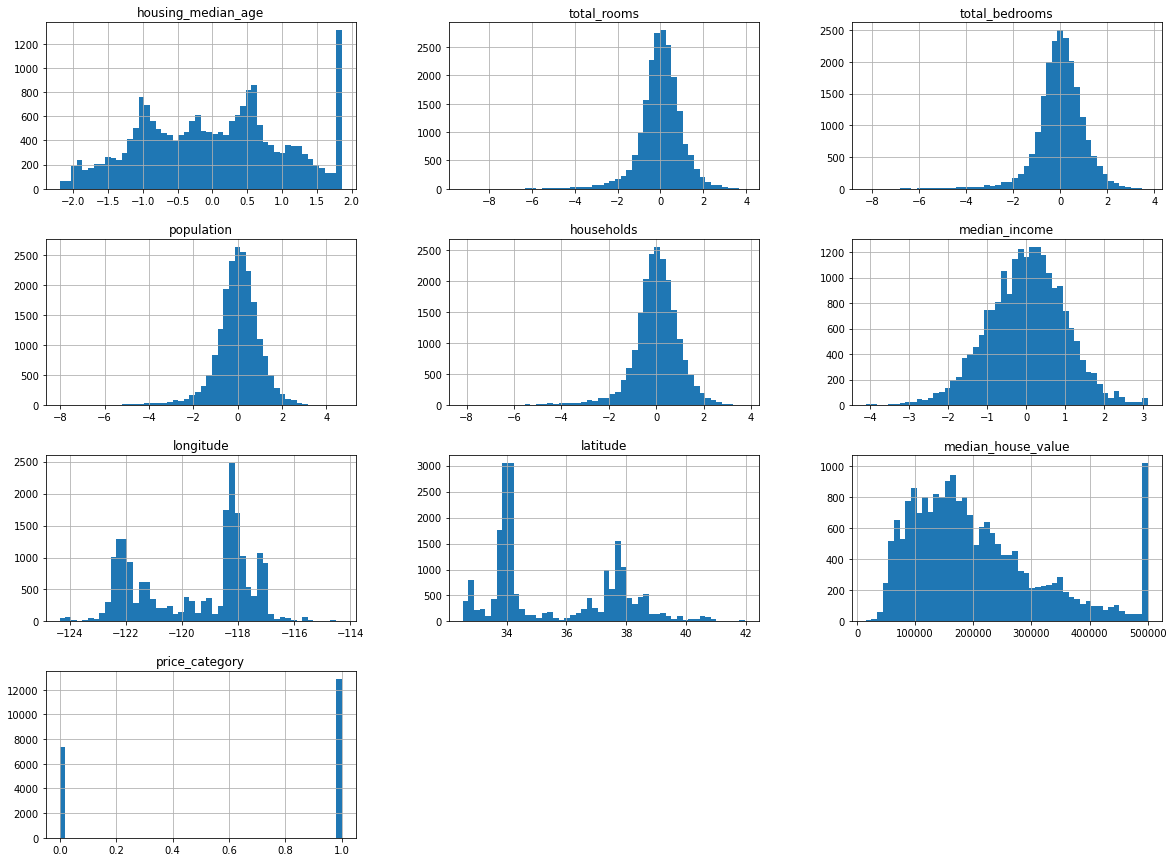

In [46]:
%matplotlib inline
houses_standard.hist(bins = 50, figsize= (20,15))
plt.show()

# Выбор модели предсказания

Для оценки качества работы алгоритма на каждом из классов по отдельности мы будем использовать метрики precision (точность) и recall (полнота).

***Precision*** можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными.

***Recall*** показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов.

**F-мера** - это среднее гармоническое precision и recall:

 $\huge F = \frac {2 \cdot precision \cdot recall} {precision + recall} $
 
F-мера достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю.

**Загрузим необходимые библиотеки:**

In [47]:
from time import process_time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

Подготовим данные для обучения. Нам необходимо разбить нашу выборку на тренировочную (ту по которой мы будем обучать наши модели) и тестовую (ту по которой мы будем проверять на сколько хорошо наша модель работает).

Для подбора наилучших параметров мы будем использовать *GridSearchCV*

*GridSearchCV* находит наилучшие параметры, путем обычного перебора: он создает модель для каждой возможной комбинации параметров. Важно отметить, что такой подход может быть весьма времязатратным.
Если бы наш датасет был намного больше или мы бы хотели сократить время обучения, то мы бы могли воспользоваться *RandomizedSearchCV*, основная особенность *RandomizedSearchCV* заключается в том, что выбор параметров является случайным, что позволяет сократить время на обучение.

In [48]:
#заменим категориальные переменные на числовые для дальнейшей работы
houses['ocean_proximity'] = houses['ocean_proximity'].replace({'ISLAND': 1,
                                          'NEAR OCEAN': 2,
                                          '<1H OCEAN': 3,
                                          'NEAR BAY': 4,
                                          'INLAND': 5})

Разделим наши данные на признаки, *по которым* мы будем предсказывать (X) и на целевой (y), который будем учиться предсказывать

In [49]:
X = houses.drop(['median_house_value', 'price_category'], axis=1)
y = houses.price_category

Тестовую выборку возьмём равную 33% от общего числа всей выборки, в параметр stratify укажем по какой выборке мы хотим сделать равномерное распределение классов (так, чтобы в обучающую и тестовую выборки попали классы в равном соотношении), зададим random_state для повторяемости всех процессов:

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

Посмотрим как распределены классы в тренировочной и тестовой выборке.

In [51]:
print("Распределение классов в тренировочной выборке равно: ", round((np.bincount(y_train)[0]/np.bincount(y_train)[1])*100, 2),"%")
print("Распределение классов в тестовой выборке равно: ", round((np.bincount(y_test)[0]/np.bincount(y_test)[1])*100, 2),"%")

Распределение классов в тренировочной выборке равно:  57.83 %
Распределение классов в тестовой выборке равно:  57.8 %


In [52]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13103,-121.34,38.44,14,8.072467,6.142037,7.271704,6.122493,1.748365,5
15495,-117.18,33.11,16,8.151910,6.398595,7.087574,6.313548,1.645075,2
1956,-120.76,38.73,17,6.238325,4.859812,5.749393,4.941642,0.446287,5
442,-122.28,37.88,52,6.863803,5.236442,5.998937,5.147494,1.173843,4
14077,-117.12,32.76,41,7.292337,6.042633,6.688355,5.978886,0.781890,2


In [53]:
metrics_score = pd.DataFrame(columns=['precision', 'recall', 'f-value', 'time']) #создадим пустой датафрейм для последующего сравнения точности наших моделей

## Дерево решений

Разделение данных на подвыборки по определенному условию в виде древовидной структуры. Математически разделение на классы происходит до тех пор, пока не найдутся все условия, определяющие класс максимально точно, т. е. когда в каждом классе отсутствуют представители другого класса.

In [54]:
from sklearn import tree
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV

dt = tree.DecisionTreeClassifier(random_state=42) # создадим "пустое" дерево
parameters_dt = {'criterion': ['entropy'], 'max_depth': range(1, 11), 'min_samples_leaf': range(1,9)} #словарь с параметрами 
grid_search_cv_dt = GridSearchCV(dt, parameters_dt, cv=5) # параметр cv указывает на количество выборок для кросс-валидации

**обучим модель с наилучшими параметрами и посмотрим на время обучения**

In [55]:
t_start = process_time() #запуск счётчика для подсчёта времени затраченного на обучение
grid_search_cv_dt.fit(X_train, y_train)
t_stop = process_time() #остановка счётчика
t = t_stop - t_start

In [56]:
grid_search_cv_dt.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 7}

In [57]:
best_dt = grid_search_cv_dt.best_estimator_ #сохраняем дерево с наилучшими параметрами

In [58]:
y_pred = best_dt.predict(X_test) # предсказанный 'y' на основе X_test по нашему наилучшему дереву решений

In [59]:
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('f-value:', f1_score(y_test, y_pred))

Precision: 0.8999295278365046
Recall: 0.8965597940556985
f-value: 0.8982415005861665


In [60]:
metrics_score = metrics_score.append({'precision': precision_score(y_test, y_pred), 
                                      'recall': recall_score(y_test, y_pred), 
                                      'f-value': f1_score(y_test, y_pred), 
                                      'time': t},
                                     ignore_index=True)

In [61]:
#plot_roc_curve(best_dt, X_test, y_test)

## Метод k-ближайших соседей

Классифицирует каждое наблюдение по степени похожести на остальные наблюдения.

In [62]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()

parameters_neigh = {"n_neighbors": [2,3,5,7], "metric": ['euclidean']} #словарь с параметрами 
grid_search_cv_neigh = GridSearchCV(neigh, parameters_neigh, cv=5)

In [63]:
t_start = process_time() #запуск счётчика для подсчёта времени затраченного на обучение
grid_search_cv_neigh.fit(X_train, y_train)
t_stop = process_time() #остановка счётчика
t = t_stop - t_start

In [64]:
best_neigh = grid_search_cv_neigh.best_estimator_
grid_search_cv_neigh.best_params_

{'metric': 'euclidean', 'n_neighbors': 7}

In [65]:
y_pred = best_neigh.predict(X_test)

In [66]:
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('f-value:', f1_score(y_test, y_pred))

Precision: 0.8540820929183581
Recall: 0.8862625789843201
f-value: 0.8698748133685541


In [67]:
metrics_score = metrics_score.append({'precision': precision_score(y_test, y_pred), 
                                      'recall': recall_score(y_test, y_pred), 
                                      'f-value': f1_score(y_test, y_pred), 
                                      'time': t},
                                     ignore_index=True)

In [68]:
#plot_roc_curve(best_neigh, X_test, y_test)

## Метод опорных векторов (SVM, support vector machine)

Каждый объект данных представляется как вектор (точка) в p-мерном пространстве. Задача — разделить точки гиперплоскостью. То есть, можно ли найти такую гиперплоскость, чтобы расстояние от неё до ближайшей точки было максимальным. Искомых гиперплоскостей может быть много, поэтому полагают, что максимизация зазора между классами способствует более уверенной классификации.

In [69]:
from sklearn import svm


svm_m = svm.SVC()

parameters_svm = {'kernel': ['linear', 'poly', 'rbf'], 'max_iter': range(500, 2001, 500)} #словарь с параметрами 
grid_search_cv_svm = GridSearchCV(svm_m, parameters_svm, cv=5)

In [70]:
t_start = process_time() #запуск счётчика для подсчёта времени затраченного на обучение
grid_search_cv_svm.fit(X_train, y_train)
t_stop = process_time() #остановка счётчика
t = t_stop - t_start

In [71]:
best_svm = grid_search_cv_svm.best_estimator_
grid_search_cv_svm.best_params_

{'kernel': 'poly', 'max_iter': 500}

In [72]:
y_pred = best_svm.predict(X_test)

In [73]:
metrics_score = metrics_score.append({'precision': precision_score(y_test, y_pred), 
                                      'recall': recall_score(y_test, y_pred), 
                                      'f-value': f1_score(y_test, y_pred), 
                                      'time': t},
                                     ignore_index=True)

## Логистическая регрессия

метод построения линейного классификатора, позволяющий оценивать вероятности принадлежности объектов к классам. Логистическая регрессия применяется для прогнозирования вероятности возникновения некоторого события по значениям множества признаков.

In [74]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(random_state=42)

parameters_lr = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'max_iter': range(100, 501, 100)} #словарь с параметрами 
grid_search_cv_lr = GridSearchCV(lr, parameters_lr, cv=5)

In [75]:
t_start = process_time() #запуск счётчика для подсчёта времени затраченного на обучение
grid_search_cv_lr.fit(X_train, y_train)
t_stop = process_time() #остановка счётчика
t = t_stop - t_start

In [76]:
best_lr = grid_search_cv_lr.best_estimator_
grid_search_cv_lr.best_params_

{'max_iter': 100, 'solver': 'newton-cg'}

In [77]:
y_pred = best_lr.predict(X_test)

In [78]:
metrics_score = metrics_score.append({'precision': precision_score(y_test, y_pred), 
                                      'recall': recall_score(y_test, y_pred), 
                                      'f-value': f1_score(y_test, y_pred), 
                                      'time': t},
                                     ignore_index=True)

## Случайный лес (Random Forest)
Случайный лес — один из примеров объединения классификаторов в ансамбль.
Ансамбль алгоритмов (методов) — метод, который использует несколько обучающих алгоритмов с целью получения лучшей эффективности прогнозирования, чем можно было бы получить от каждого обучающего алгоритма по отдельности.
Таким образом, случайный лес — это совокупность множества решающих деревьев, при обучении которых для каждого разбиения признаки выбираются из некоторого случайного подмножества признаков.

In [79]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(random_state=42)
parameters_rf = {'n_estimators': range(5, 21, 5), 'max_depth': range(1, 11), 'min_samples_leaf': range(1,9)}
grid_search_cv_rf = GridSearchCV(rf, parameters_rf, cv=5)

In [80]:
t_start = process_time() #запуск счётчика для подсчёта времени затраченного на обучение
grid_search_cv_rf.fit(X_train, y_train)
t_stop = process_time() #остановка счётчика
t = t_stop - t_start

In [81]:
best_rf = grid_search_cv_rf.best_estimator_
grid_search_cv_rf.best_params_

{'max_depth': 10, 'min_samples_leaf': 7, 'n_estimators': 10}

In [82]:
y_pred = best_rf.predict(X_test)

In [83]:
metrics_score = metrics_score.append({'precision': precision_score(y_test, y_pred), 
                                      'recall': recall_score(y_test, y_pred), 
                                      'f-value': f1_score(y_test, y_pred), 
                                      'time': t},
                                     ignore_index=True)

## XGBoost*
одна из самых популярных и эффективных реализаций алгоритма градиентного бустинга на деревьях.

Основной идеей бустинга является комбинирование слабых функций, которые строятся в ходе итеративного процесса, где на каждом шаге новая модель обучается с использованием данных об ошибках предыдущих.

Одним из недостатков бустинга является то, что он может приводить к построению громоздких композиций, состоящих из сотен алгоритмов. Такие композиции исключают возможность содержательной интерпретации, требуют больших объёмов памяти для хранения базовых алгоритмов и существенных затрат времени на вычисление классификаций.

In [84]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')

In [85]:
t_start = process_time() #запуск счётчика для подсчёта времени затраченного на обучение
xgb_model.fit(X_train, y_train)
t_stop = process_time() #остановка счётчика
t = t_stop - t_start

In [86]:
y_pred = xgb_model.predict(X_test)

In [87]:
metrics_score = metrics_score.append({'precision': precision_score(y_test, y_pred), 
                                      'recall': recall_score(y_test, y_pred), 
                                      'f-value': f1_score(y_test, y_pred), 
                                      'time': t},
                                     ignore_index=True)

# CatBoost

CatBoost — это библиотека градиентного бустинга, созданная Яндексом. Она использует небрежные (oblivious) деревья решений, чтобы вырастить сбалансированное дерево. Одни и те же функции используются для создания левых и правых разделений (split) на каждом уровне дерева. По сравнению с классическими деревьями, небрежные деревья более эффективны при реализации на процессоре и просты в обучении. Библиотека позволяет получить отличные результаты с параметрами по умолчанию, что сокращает время, необходимое для настройки гиперпараметров.

In [88]:
from catboost import CatBoostClassifier
cb_model = CatBoostClassifier(random_state=42)

In [96]:
t_start = process_time() #запуск счётчика для подсчёта времени затраченного на обучение
cb_model.fit(X_train, y_train, silent=True)
t_stop = process_time() #остановка счётчика
t = t_stop - t_start

In [97]:
y_pred = cb_model.predict(X_test)

In [92]:
metrics_score = metrics_score.append({'precision': precision_score(y_test, y_pred), 
                                      'recall': recall_score(y_test, y_pred), 
                                      'f-value': f1_score(y_test, y_pred), 
                                      'time': t},
                                     ignore_index=True)

In [98]:
metrics_score = metrics_score.rename(index={0: 'decision_tree',
                            1: 'k_neighbors',
                            2: 'SVM',
                            3: 'logistic_regression',
                            4: 'random_forest',
                            5: 'xgboost',
                            6: 'CatBoost',})
metrics_score

,precision,recall,f-value,time
decision_tree,0.899930,0.896560,0.898242,27.954399
k_neighbors,0.854082,0.886263,0.869875,2.494074
SVM,0.650767,0.992979,0.786250,51.274988
logistic_regression,0.863097,0.901474,0.881868,161.198510
random_forest,0.902400,0.915282,0.908795,260.361593
xgboost,0.919991,0.928388,0.924170,4.277768
CatBoost,0.916377,0.925813,0.921071,24.807402


**Исходя из полученных данных мы можем сделать вывод, что для нашей задачи классификации наилучшим решением будет использование XGBoost.**